# High Frequency Words

Team 2: Pavan Akula, Nathan(Seoungyoon) Lim, Christophe Hunt, Joel Park, Ilya Kats

Please answer the following questions in an IPython Notebook, posted to GitHub.

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

1. Choose a corpus of interest.

The corpus of interest that we will tackle is the candidate speeches between Donald Trump and Hillary Clinton in 2016.

Let's load the corpus. Let's start with Hillary Clinton and then load Donald Trump's speeches.

In [2]:
# Citing a webpage that I referenced:
# Resource: https://technaverbascripta.wordpress.com/2012/
# 09/25/loading-a-corpus-into-the-natural-language-toolkit/

# Load libraries
import nltk
import re # Will need regular expressions to clean up the texts
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
import os
os.chdir('/Users/Joel/Documents/MSDA/CUNY 620/Week 4/Clinton-Trump Corpus/Clinton')

In [4]:
# Looking at the first document
f = open('Clinton_2016-07-28.txt', 'rU')
text = f.read()
text1 = text.split()
abstracts = nltk.Text(text1)

In [5]:
# By using the concordance function in nltk, we can take a look at all the words that surround
# and make the context for the thank you!
abstracts.concordance('thank')

Displaying 14 of 14 matches:
                                     Thank you. Thank you so much. <APPLAUSE> T
                                     Thank you so much. <APPLAUSE> Thank you. T
k you. Thank you so much. <APPLAUSE> Thank you. Thank you all so much. <APPLAUS
k you so much. <APPLAUSE> Thank you. Thank you all so much. <APPLAUSE> <CLINTON
u all so much. <APPLAUSE> <CLINTON:> Thank you! Thank you! <APPLAUSE> Thank you
ch. <APPLAUSE> <CLINTON:> Thank you! Thank you! <APPLAUSE> Thank you all very, 
N:> Thank you! Thank you! <APPLAUSE> Thank you all very, very much! Thank you f
AUSE> Thank you all very, very much! Thank you for that amazing welcome! Thank 
 Thank you for that amazing welcome! Thank you all for the great convention tha
t we've had. <APPLAUSE> And Chelsea, thank you. I am so proud to be your mother
so proud of the woman you've become. Thank you for bringing Mark into our famil
 who joined this campaign this week, thank you. What a remarkable week it's bee
 president.

In [6]:
# The beginning portions of the first speech...
abstracts

<Text: <title="Hillary Clinton delivers remarks at the 2016 Democratic...>

As you can see, there's a lot of 'fluff' i.e. tags APPLAUSE and CLINTON. that we do not want to take into consideration when we perform text analysis. We will get back to this at a later time. Let's take a look into the rest of the speeches.

In [7]:
# How many Clinton speeches are there?
print len([name for name in os.listdir('.') if os.path.isfile(name)])

36


In [8]:
# List out the .txt files associated with the Clinton Speeches
os.listdir('.')

['Clinton_2016-07-28.txt',
 'Clinton_2016-07-29.txt',
 'Clinton_2016-08-01.txt',
 'Clinton_2016-08-05.txt',
 'Clinton_2016-08-10.txt',
 'Clinton_2016-08-11.txt',
 'Clinton_2016-08-15.txt',
 'Clinton_2016-08-16.txt',
 'Clinton_2016-08-17.txt',
 'Clinton_2016-08-25.txt',
 'Clinton_2016-08-31.txt',
 'Clinton_2016-09-05-A.txt',
 'Clinton_2016-09-05-B.txt',
 'Clinton_2016-09-06.txt',
 'Clinton_2016-09-08-A.txt',
 'Clinton_2016-09-08-B.txt',
 'Clinton_2016-09-08-C.txt',
 'Clinton_2016-09-29.txt',
 'Clinton_2016-09-30.txt',
 'Clinton_2016-10-03.txt',
 'Clinton_2016-10-24.txt',
 'Clinton_2016-10-26.txt',
 'Clinton_2016-10-31-A.txt',
 'Clinton_2016-10-31-B.txt',
 'Clinton_2016-11-01-A.txt',
 'Clinton_2016-11-01-B.txt',
 'Clinton_2016-11-04-A.txt',
 'Clinton_2016-11-04-B.txt',
 'Clinton_2016-11-05.txt',
 'Clinton_2016-11-06-A.txt',
 'Clinton_2016-11-06-B.txt',
 'Clinton_2016-11-07-A.txt',
 'Clinton_2016-11-07-B.txt',
 'Clinton_2016-11-07-C.txt',
 'Clinton_2016-11-08.txt',
 'Clinton_2016-11-09.tx

As we mentioned above, when we inspect the all of the documents more closely, there's a lot of tags that should not be used for text analysis. For example, the  tags AUDIENCE, TITLE, or the moderators. After looking at a series of documents, it appears that Clinton and Trump's statements do not have tags around their bodies of statements. Therefore, we'll use regular expressions to take the excess, and unnecessary texts. And then once we have cleaned up the text, we will load them into one list called 'clinton_list'.

In [9]:
# Create a list of Clinton speeches
clinton_list = []

for name in os.listdir('.'):
    f = open(name, 'rU')
    text = f.read()
    mod_text = re.sub('<.*?>', '', text) #Remove all of the unnecessary <> tags
    text1 = mod_text.split()
    abstracts = nltk.Text(text1)
    clinton_list.append(abstracts)

In [29]:
clinton_list

[<Text: Thank you. Thank you so much. Thank you....>,
 <Text: Hello. Thank you. Whoa, thank you all so...>,
 <Text: And after the convention was over, starting Friday...>,
 <Text: Good morning. I am so pleased to be...>,
 <Text: I am so happy to be back here...>,
 <Text: Thank you. Thank you so much. I have...>,
 <Text: Hello. Wow. Hello, everyone. Thank you. Thank you...>,
 <Text: Hello, Philadelphia. Wow. I -- thank you. Thank...>,
 <Text: Hello. Thank you. Thank you so much. Wow....>,
 <Text: Thank you. Thank you so much. I --...>,
 <Text: Good afternoon. I am delighted to have this...>,
 <Text: Hey, Cleveland. Happy, happy Labor Day. When we...>,
 <Text: Hello. Wow. Thank you all. Thank you. Thank...>,
 <Text: I know I'm only the second most exciting...>,
 <Text: Good morning, good morning. Good morning, everyone. Last...>,
 <Text: Good evening, this is the day the lord...>,
 <Text: Whoa, it is so great to be here....>,
 <Text: Before they cast their votes early or on...>,
 <Text: 

In [33]:
# Again, let's take a look at the cleaner version of the first speech
clinton_list[0]

# As you can see, the text is cleaned up quite significantly.

<Text: Thank you. Thank you so much. Thank you....>

2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

In [10]:
# Let's take the first speech and count how many words there are?
len(clinton_list[0])

5410

As you can see, there are a total of 5410 words. However, we need to find the total amount of unique words that are in the corpus (at least for this first speech). Let's use the function set(). 

In [11]:
len(set(clinton_list[0]))

1776

There are 1776 (like the birth year of America) unique words in the first speech alone. Now let's perform the same function, but over the entire list for clinton_list.

There are many different variations of the same word in this corpus. For example, 'bringing' and 'bring' will be considered one unique word, and not two separate words. To do this, we will be 'stemming' the words so that way we can try to standardize the words in a way that won't create accidental duplicates of the words (and get counted twice.)

From the website noted below, the defintion of stemming is: "Interfaces used to remove morphological affixes from words, leavingonly the word stem. Stemming algorithms aim to remove those affixes required for eg. grammatical role, tense, derivational morphology leaving only the stem of the word.  This is a difficult problem due to irregular words (eg. common verbs in English), complicated morphological rules, and part-of-speech and sense ambiguities (eg. ``ceil-`` is not the stem of ``ceiling``)."

In [64]:
# https://stackoverflow.com/questions/771918/how-do-i-do-word-stemming-or-lemmatization
from nltk.stem.porter import PorterStemmer

# There are three main stemmer algorithms: Lancaster, Porter, and Snowball
# In this particular example, we will use the PorterStemmer by random selection

porter_stemmer = PorterStemmer()

word_list_clinton = []
for speech in (clinton_list):
    for word in speech:
        # https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string-in-python
        word2 = re.sub(r'[^\w\s]','',word)
        temp = porter_stemmer.stem(word2)
        if temp not in word_list_clinton:
            word_list_clinton.append(temp)

word_list_clinton

['thank',
 'you',
 'so',
 'much',
 'all',
 u'veri',
 'for',
 'that',
 u'amaz',
 u'welcom',
 'the',
 'great',
 u'convent',
 'weve',
 'had',
 'and',
 'chelsea',
 'I',
 'am',
 'proud',
 'to',
 'be',
 'your',
 'mother',
 'of',
 'woman',
 u'youv',
 u'becom',
 u'bring',
 'mark',
 'into',
 'our',
 u'famili',
 u'charlott',
 'aidan',
 'world',
 'bill',
 u'convers',
 'we',
 u'start',
 'in',
 'law',
 u'librari',
 '45',
 u'year',
 'ago',
 'it',
 'is',
 'still',
 u'go',
 'strong',
 'know',
 u'ha',
 u'last',
 'through',
 'good',
 u'time',
 u'fill',
 'us',
 'with',
 'joy',
 'hard',
 u'test',
 'ive',
 'even',
 'gotten',
 'a',
 'few',
 u'word',
 'along',
 'way',
 'On',
 'tuesday',
 'night',
 u'wa',
 u'happi',
 'see',
 'my',
 u'explain',
 'chief',
 'on',
 'job',
 'Im',
 'also',
 u'grate',
 'rest',
 u'friend',
 u'lifetim',
 'To',
 'whose',
 'work',
 'brought',
 'here',
 'tonight',
 'those',
 'who',
 u'join',
 u'thi',
 'campaign',
 'week',
 'what',
 u'remark',
 'been',
 'We',
 'heard',
 'man',
 'from',
 '

In [56]:
# Given that the word_list is already unique, we can simply count the amount of words in the
# list to give us number of unique words in the Clinton Speech Corpus.
len(word_list_clinton)

4431

Now let us perform the same workup but for Donald Trump's speeches

In [65]:
os.chdir('/Users/Joel/Documents/MSDA/CUNY 620/Week 4/Clinton-Trump Corpus/Trump')

trump_list = []

for name in os.listdir('.'):
    f = open(name, 'rU')
    text = f.read()
    mod_text = re.sub('<.*?>', '', text) #Remove all of the unnecessary <> tags
    text1 = mod_text.split()
    abstracts = nltk.Text(text1)
    trump_list.append(abstracts)
    
trump_list

[<Text: Thank you very much. We had an amazing...>,
 <Text: Thank you, Mike. Thank you, everybody. Who ?...>,
 <Text: Thank you very much, everybody. Wow. Thank you....>,
 <Text: So, it's been 235 days since crooked Hillary...>,
 <Text: Thank you. Whoa. Whoa. This is amazing. This...>,
 <Text: Thank you. Thank you. Thank you very much....>,
 <Text: Thank you. So we have tremendous crowds of...>,
 <Text: I want to tell you, you happen to...>,
 <Text: So how good is he? How good is...>,
 <Text: Thank you,everybody. Thank you very much. Thank you....>,
 <Text: Well, thank you very much. And he's not...>,
 <Text: Thank you. What a beautiful crowd. Thank you....>,
 <Text: Thank you. Thank you, everybody. Thank you. Unbelievable....>,
 <Text: Thank you. Thank you everybody. Thank you very...>,
 <Text: Thank you! Thank you, everybody! Thank you! What...>,
 <Text: Absolutely it is. And we're not taking it,...>,
 <Text: Thank you. Thank you. Thank you very much....>,
 <Text: Thank you very much

In [66]:
word_list_trump = []
for speech in (trump_list):
    for word in speech:
        # https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string-in-python
        word2 = re.sub(r'[^\w\s]','',word)
        temp = porter_stemmer.stem(word2)
        if temp not in word_list_trump:
            word_list_trump.append(temp)

word_list_trump

['thank',
 'you',
 u'veri',
 'much',
 'We',
 'had',
 'an',
 u'amaz',
 u'convent',
 'that',
 u'wa',
 'one',
 'of',
 'the',
 'best',
 'I',
 'think',
 'it',
 'ever',
 'In',
 u'term',
 '',
 'in',
 'enthusiasm',
 'what',
 u'repres',
 u'get',
 'our',
 'word',
 'out',
 'ivanka',
 u'incred',
 'last',
 'night',
 'she',
 'did',
 'job',
 'and',
 'so',
 u'mani',
 u'speaker',
 'were',
 u'groundset',
 'mean',
 u'realli',
 'just',
 u'someth',
 'special',
 'even',
 'good',
 u'mark',
 'on',
 u'televis',
 'can',
 u'believ',
 u'thi',
 'hard',
 'to',
 'Oh',
 'theyll',
 u'chang',
 'dont',
 u'worri',
 'but',
 u'ha',
 'been',
 'four',
 u'day',
 'want',
 u'peopl',
 'cleveland',
 'ohio',
 u'becaus',
 u'theyv',
 'done',
 'know',
 'we',
 'read',
 'two',
 'three',
 u'week',
 'ago',
 'is',
 u'go',
 'be',
 u'horribl',
 'have',
 u'riot',
 u'problem',
 u'everyth',
 'a',
 u'probabl',
 'most',
 u'peac',
 u'beauti',
 u'lovefil',
 u'histori',
 'when',
 'they',
 'talk',
 'about',
 u'uniti',
 'tell',
 'right',
 'saw',
 u'p

Above, is the list of unique word list for Donald Trump's speeches.

In [67]:
# Total unique word count for Donald Trump's speeches
len(word_list_trump)

6167

Believe it or not, it appears that Donald Trump has used more unique words than Hillary Clinton. (However, the quality of the words could be up for debate!)

3. Taking the most common words, how many unique words represent half of the total words in the corpus?

4. Identify the 200 highest frequency words in this corpus.

5. Create a graph that shows the relative frequency of these 200 words.

These 3 questions will be addressed simultaneously as by addressing one of these questions, we can certainly address the other two questions. (The questions will be answered slightly out of order.) 

In order to calculate how many unique words repreent half of the total words in the corpus, we need to calculate the total number of words for all of the speech corpus for each candidate (Donald Trump and Hillary Clinton). 

In [71]:
# Hillary Clinton
# Again, quite similarly, will create an entire list of all of the speeches.
# The code will look quite similar as above, but with some slight differences
hillary_speech = []

for speech in clinton_list:
    for word in speech:
        word2 = re.sub(r'[^\w\s]','',word)
        temp = porter_stemmer.stem(word2)
        hillary_speech.append(temp)

hillary_speech

['thank',
 'you',
 'thank',
 'you',
 'so',
 'much',
 'thank',
 'you',
 'thank',
 'you',
 'all',
 'so',
 'much',
 'thank',
 'you',
 'thank',
 'you',
 'thank',
 'you',
 'all',
 u'veri',
 u'veri',
 'much',
 'thank',
 'you',
 'for',
 'that',
 u'amaz',
 u'welcom',
 'thank',
 'you',
 'all',
 'for',
 'the',
 'great',
 u'convent',
 'that',
 'weve',
 'had',
 'and',
 'chelsea',
 'thank',
 'you',
 'I',
 'am',
 'so',
 'proud',
 'to',
 'be',
 'your',
 'mother',
 'and',
 'so',
 'proud',
 'of',
 'the',
 'woman',
 u'youv',
 u'becom',
 'thank',
 'you',
 'for',
 u'bring',
 'mark',
 'into',
 'our',
 u'famili',
 'and',
 u'charlott',
 'and',
 'aidan',
 'into',
 'the',
 'world',
 'and',
 'bill',
 'that',
 u'convers',
 'we',
 u'start',
 'in',
 'the',
 'law',
 u'librari',
 '45',
 u'year',
 'ago',
 'it',
 'is',
 'still',
 u'go',
 'strong',
 'you',
 'know',
 'that',
 u'convers',
 u'ha',
 u'last',
 'through',
 'good',
 u'time',
 'that',
 u'fill',
 'us',
 'with',
 'joy',
 'and',
 'hard',
 u'time',
 'that',
 u'tes

In [72]:
# Calculate the total amount of words in the Hillary's speech corpus
total_words_clinton = len(hillary_speech)
total_words_clinton

114305

In [83]:
# Therefore half of the total amount of words would be:
from __future__ import division # Given python 2, will give floating numbers, instead of ints
half_words_clinton = int(total_words_clinton/2) # need to round to a whole number, since
                                                # we can't have a fraction of a word
half_words_clinton

57152

In [91]:
# Convert list into string
# https://stackoverflow.com/questions/5618878/how-to-convert-list-to-string

hillary_str = ' '.join(hillary_speech)
hillary_str

u'thank you thank you so much thank you thank you all so much thank you thank you thank you all veri veri much thank you for that amaz welcom thank you all for the great convent that weve had and chelsea thank you I am so proud to be your mother and so proud of the woman youv becom thank you for bring mark into our famili and charlott and aidan into the world and bill that convers we start in the law librari 45 year ago it is still go strong you know that convers ha last through good time that fill us with joy and hard time that test us and ive even gotten a few word in along the way On tuesday night I wa so happi to see that my explain in chief is still on the job Im also grate to the rest of my famili and to the friend of a lifetim To all of you whose hard work brought us here tonight and to those of you who join thi campaign thi week thank you what a remark week it been We heard the man from hope bill clinton and the man of hope barack obama america is stronger becaus of presid obam

In [100]:
# Using Conditional Frequency Distribution
# https://stackoverflow.com/questions/4634787/freqdist-with-nltk

words = nltk.tokenize.word_tokenize(hillary_str)
fdist_clinton = FreqDist(words)
fdist_clinton

FreqDist({u'demand': 5,
          u'four': 31,
          u'protest': 6,
          u'asian': 2,
          u'captain': 11,
          u'whose': 18,
          u'accus': 6,
          u'fouryear': 12,
          u'sorri': 8,
          u'lord': 2,
          u'digit': 1,
          u'appal': 1,
          u'void': 1,
          u'voic': 16,
          u'housemaid': 1,
          u'publicpriv': 1,
          u'govern': 30,
          u'affect': 12,
          u'broward': 4,
          u'vast': 8,
          u'look': 153,
          u'disturb': 4,
          u'whitman': 1,
          u'wednesday': 3,
          u'andra': 1,
          u'budget': 10,
          u'second': 24,
          u'diseas': 3,
          u'even': 134,
          u'battleground': 2,
          u'wreck': 5,
          u'neg': 9,
          u'rafalki': 1,
          u'asia': 4,
          u'nea': 1,
          u'new': 185,
          u'tirelessli': 2,
          u'ever': 80,
          u'pandem': 1,
          u'ongo': 2,
          u'elimin': 10,
        

In [111]:
# Answering question 4 for the 200 most commonly (unique) used words in the Clinton Corpus
# https://stackoverflow.com/questions/23042699/freqdist-in-nltk-not-sorting-output
fdist_clinton.most_common(200)

[(u'to', 4418),
 (u'and', 4390),
 (u'the', 3956),
 (u'I', 2581),
 (u'of', 2261),
 (u'that', 2183),
 (u'a', 1994),
 (u'you', 1948),
 (u'in', 1716),
 (u'we', 1400),
 (u'for', 1308),
 (u'it', 1205),
 (u'is', 1120),
 (u'our', 1077),
 (u'have', 1022),
 (u'he', 852),
 (u'be', 831),
 (u'what', 822),
 (u'go', 764),
 (u'thi', 756),
 (u'are', 740),
 (u'peopl', 677),
 (u'do', 674),
 (u'not', 658),
 (u'know', 655),
 (u'on', 652),
 (u'who', 627),
 (u'with', 601),
 (u'work', 581),
 (u'all', 581),
 (u'about', 579),
 (u'want', 566),
 (u'but', 555),
 (u'were', 552),
 (u'will', 550),
 (u'can', 532),
 (u'make', 507),
 (u'as', 502),
 (u'wa', 498),
 (u'becaus', 496),
 (u'get', 486),
 (u'they', 483),
 (u'your', 469),
 (u'so', 466),
 (u'my', 455),
 (u'america', 425),
 (u'just', 408),
 (u'trump', 393),
 (u'out', 381),
 (u'countri', 377),
 (u'when', 374),
 (u'here', 372),
 (u'at', 371),
 (u'We', 368),
 (u'presid', 359),
 (u'more', 358),
 (u'from', 355),
 (u'hi', 353),
 (u'now', 352),
 (u'up', 352),
 (u'america

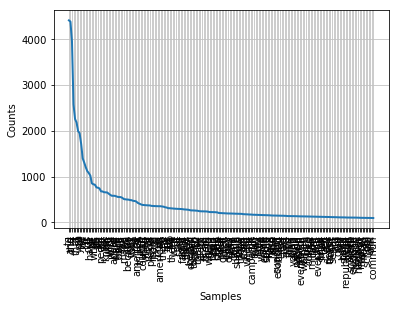

In [112]:
# To answer question 5, create a graph that shows the relative frequency of these 200 words.
fdist_clinton.plot(200, cumulative = False)

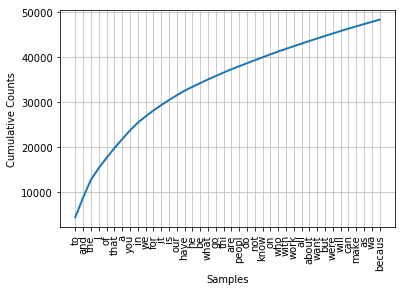

In [110]:
# To make visualization easier on the eyes, will only do the first 40 highest frequency words
fdist_clinton.plot(40, cumulative = True)

As you can see from the above graph that we are at 40 words and have not yet hit 50k words to make the halfway mark. (The number to reach for halfway mark is: 57152). Let's find out how many unique words does it take to make it to 57152! (This will answer question 3). 

In [125]:
total_word_count = 0
unique_count = 0

for word, count in fdist_clinton.most_common(200):
    if total_word_count < 57152:
        unique_count = unique_count + 1
        total_word_count = total_word_count + count
    else:
        print("Total number of unique words to make half of the words is:", unique_count)
        break

('Total number of unique words to make half of the words is:', 63)


6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

According to Wikipedia (https://en.wikipedia.org/wiki/Zipf%27s_law), "Zipf's law is an empirical law formulated using mathematical statistics that refers to the fact that many types of data studied in the physical and social sciences can be approximated with a Zipfian distribution, one of a family of related discrete power law probability distributions. Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation."

As we look at the frequency distribution in the above graph, we do notice that there is a power distribution, so yes, this distribution does follow Zipf's law. 

7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

I suspect that most of the word choices here in this corpus are more related to politics and patriotism. Therefore, some words, such as "America" and "democracy" will most likely show up more frequently than usual. As demonstrated as below: 

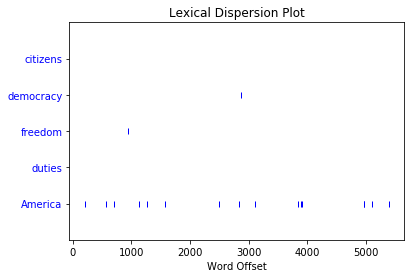

In [34]:
# http://www.nltk.org/book/ch01.html
clinton_list[0].dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [ ]:
######################################## Will likely discard the information below.

Let's analyse the first speech from Clinton. Typically, words that are often used during political speeches include i.e. 'citizens', 'democracy', 'freedom', 'duties', 'America'. In this particular example, we can take the first speech and investigate how frequently these words come up.

In [35]:
# Length of the speech (words)
len(clinton_list[0])

5410

In [36]:
# Word count analysis
from __future__ import division # Given python 2, will give floating numbers, instead of ints

# Lexical Diversity and Percentage
def lexical_diversity(text):
    return len(text)/len(set(text))

def percentage(count, total): #?? This could probably be taken out
    return 100 * count/total

In [37]:
lexical_diversity(clinton_list[0])

3.046171171171171

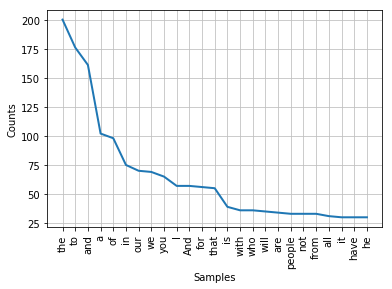

In [49]:
# Frequency Distribution
# "Frequency of each vocabulary item in the text."
fdist1 = FreqDist(clinton_list[0])
fdist1.plot(25, cumulative = False)

In [ ]:
# Too many stopwords.
# Let's try to rid of the stopwords

In [56]:
from nltk.corpus import stopwords

filtered_clinton_1 = [word for word in clinton_list[0] if word not in stopwords.words('english')]
filtered_clinton_1[:50]

['Thank',
 'you.',
 'Thank',
 'much.',
 'Thank',
 'you.',
 'Thank',
 'much.',
 'Thank',
 'you!',
 'Thank',
 'you!',
 'Thank',
 'very,',
 'much!',
 'Thank',
 'amazing',
 'welcome!',
 'Thank',
 'great',
 'convention',
 "we've",
 'had.',
 'And',
 'Chelsea,',
 'thank',
 'you.',
 'I',
 'proud',
 'mother',
 'proud',
 'woman',
 "you've",
 'become.',
 'Thank',
 'bringing',
 'Mark',
 'family',
 'Charlotte',
 'Aidan',
 'world.',
 'And',
 'Bill,',
 'conversation',
 'started',
 'law',
 'library',
 '45',
 'years',
 'ago...']

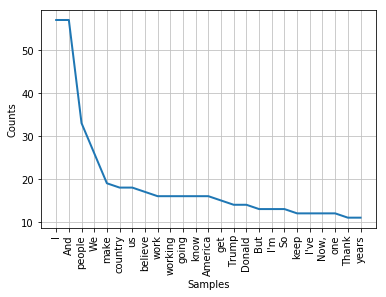

In [59]:
# Now that we rid of the stopwords, let's perform some text analysis
fdist_filtered_1 = FreqDist(filtered_clinton_1)
fdist_filtered_1.plot(25, cumulative = False)

In [45]:
# How about hapaxes (words that occur only once)
# How many hapaxes exist in the first speech?
len(fdist1.hapaxes())

1207

In [46]:
# List first 25 hapaxes
hap = fdist1.hapaxes()
hap[:25]
# Doesn't seem to be working...will need to come back

['ever.',
 'better,',
 'four-year',
 'dynamic',
 '9/11',
 'fathom',
 'four',
 'facilities',
 'saved',
 'whose',
 'tweet',
 'confidence.',
 "shouldn't",
 'risk',
 "mother's",
 'ever!',
 "women's",
 'reforms',
 'today.',
 'today,',
 'bringing',
 'courageous',
 "daughter's",
 'vote!',
 'Somoza']

In [ ]:
#cfd = nltk.ConditionalFreqDist(
#    (target, file[:4])
#    for fileid in inaugural.fileids() 
#    for w in inaugural.words(fileid) 
#    for target in ['america', 'citizen'] 
#    if w.lower().startswith(target)) 

#cfd.plot()